## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('mmc4.csv')

In [4]:
df.head()

,date_time,Time,hr,steps,Galvanic skin response,calories,temp,sec,Unnamed: 8
0,15-08-2016 00:00,00:00:00,122.0,0,0.000052,7.5,77.9,0,0.0
1,15-08-2016 00:01,00:01:00,135.0,0,0.000051,8.2,77.9,1,NaN
2,15-08-2016 00:02,00:02:00,111.0,0,0.000052,6.2,77.9,2,NaN
3,15-08-2016 00:03,00:03:00,109.0,0,0.000053,5.6,77.0,3,NaN
4,15-08-2016 00:04,00:04:00,126.0,0,0.000053,9.0,77.0,4,NaN


In [5]:
pd.set_option("display.float", "{:.2f}".format)
df.describe()

,hr,steps,Galvanic skin response,calories,temp,sec,Unnamed: 8
count,69941.00,73440.00,69921.00,73440.00,69921.00,73440.00,1.00
mean,90.09,5.40,0.09,2.34,87.41,36719.50,0.00
std,14.50,18.68,0.95,1.40,2.63,21200.45,nan
min,39.00,0.00,0.00,1.20,69.80,0.00,0.00
25%,81.00,0.00,0.00,1.50,86.00,18359.75,0.00
50%,91.00,0.00,0.00,2.00,87.80,36719.50,0.00
75%,99.00,0.00,0.00,2.60,88.70,55079.25,0.00
max,187.00,146.00,28.52,19.10,98.60,73439.00,0.00


In [6]:
df['calories'].unique()

array([ 7.5,  8.2,  6.2,  5.6,  9. ,  5.7, 10.1, 13.3, 10.4,  6.7,  8.6,
       10.3, 12.8, 10.8, 11.6, 10.7, 11.5, 12.3,  1.6,  1.5,  1.4,  3.2,
        2.8,  2.1,  2.3,  2.7,  2.9,  4.2,  3.4,  2.4,  3.3,  5.9,  9.1,
        9.8,  9.6, 10. ,  7.4,  5.5,  4.7,  2.5,  2.2,  1.8,  1.7,  3.8,
        7.2,  4.4,  2. ,  1.9,  3.6,  2.6,  4.5,  3. ,  3.7,  4.8,  5.1,
        5.2,  6.8,  7.6,  5.4,  3.1,  4.3,  6. ,  3.5,  4.1,  4. ,  6.6,
        7. ,  3.9,  6.4,  6.5,  9.5, 14.2, 11.8,  5. ,  7.7,  8.7, 10.5,
        8. ,  5.8,  4.9,  5.3,  7.1,  9.2,  9.7,  7.9,  9.4,  8.3,  7.3,
        9.9,  6.9,  8.1, 12.2,  4.6,  8.8,  8.9,  8.4,  7.8,  6.1, 14.7,
       13.8, 17.1, 10.2,  9.3, 12.5, 10.6, 12.9, 11. , 16.2, 17.3, 14.5,
        8.5, 10.9, 12.7, 13. , 13.2, 17.6, 14.1, 17.5, 16.7, 11.2, 12.6,
        1.3, 13.6,  1.2, 11.1, 12. ,  6.3, 16. , 11.7, 16.9, 17.8, 17.4,
       18. , 15.3, 11.9, 13.4, 13.1, 14.9, 13.5, 14. , 13.7, 12.1, 15.6,
       14.4, 15.1, 18.4, 15.7, 15.4, 18.6, 18.2, 16

In [7]:
df=df.drop('steps', axis=1)

In [8]:
df=df.drop('Time', axis=1)

In [9]:
df=df.drop('sec', axis=1)

In [10]:
df=df.drop('Unnamed: 8', axis=1)

In [11]:
df.head()

,date_time,hr,Galvanic skin response,calories,temp
0,15-08-2016 00:00,122.00,0.00,7.50,77.90
1,15-08-2016 00:01,135.00,0.00,8.20,77.90
2,15-08-2016 00:02,111.00,0.00,6.20,77.90
3,15-08-2016 00:03,109.00,0.00,5.60,77.00
4,15-08-2016 00:04,126.00,0.00,9.00,77.00


In [12]:
missing_values_count = df.isnull().sum()

total_cells = np.product(df.shape)

total_missing = missing_values_count.sum()

percentage_missing = (total_missing/total_cells)*100
print(percentage_missing)

2.869553376906318


In [13]:
df.isnull().sum()

date_time                    0
hr                        3499
Galvanic skin response    3519
calories                     0
temp                      3519
dtype: int64

In [14]:
df = df.bfill(axis ='columns')

In [15]:
df.head()

,date_time,hr,Galvanic skin response,calories,temp
0,15-08-2016 00:00,122.00,0.00,7.50,77.90
1,15-08-2016 00:01,135.00,0.00,8.20,77.90
2,15-08-2016 00:02,111.00,0.00,6.20,77.90
3,15-08-2016 00:03,109.00,0.00,5.60,77.00
4,15-08-2016 00:04,126.00,0.00,9.00,77.00


In [16]:
df = df.ffill(axis ='columns')

In [17]:
df.isnull().sum()

date_time                 0
hr                        0
Galvanic skin response    0
calories                  0
temp                      0
dtype: int64

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc = {'figure.figsize': (25, 7)})

<AxesSubplot:>

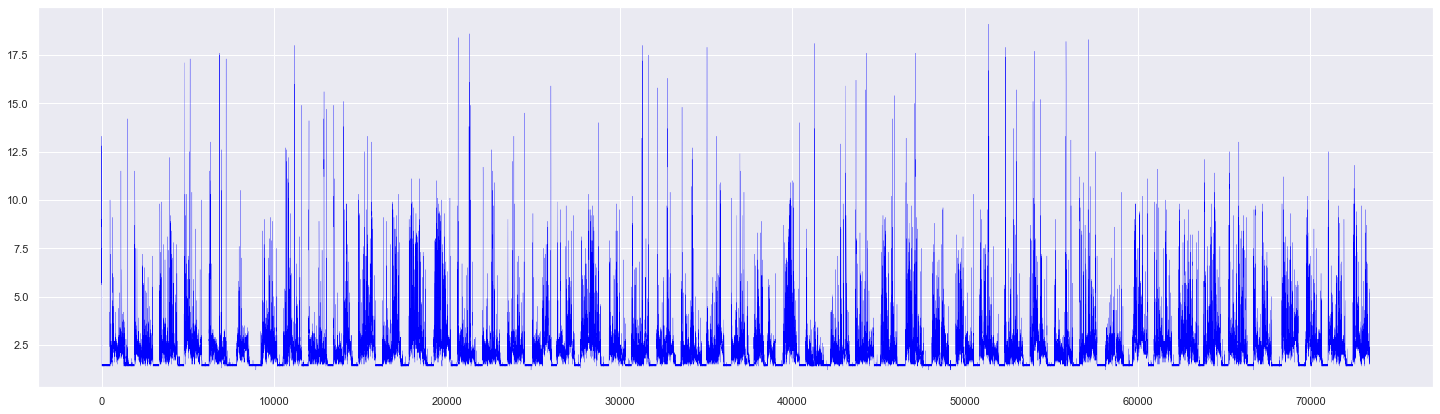

In [19]:
df['calories'].plot(linewidth = 0.2,color='blue')

In [20]:
df['date_time'] = pd.to_datetime(df['date_time'])

In [ ]:
df.dtypes

In [ ]:
# Displaying random sample of 5 rows
df.sample(5, random_state = 0)

In [21]:
df['calories'].unique()

array([ 7.5,  8.2,  6.2,  5.6,  9. ,  5.7, 10.1, 13.3, 10.4,  6.7,  8.6,
       10.3, 12.8, 10.8, 11.6, 10.7, 11.5, 12.3,  1.6,  1.5,  1.4,  3.2,
        2.8,  2.1,  2.3,  2.7,  2.9,  4.2,  3.4,  2.4,  3.3,  5.9,  9.1,
        9.8,  9.6, 10. ,  7.4,  5.5,  4.7,  2.5,  2.2,  1.8,  1.7,  3.8,
        7.2,  4.4,  2. ,  1.9,  3.6,  2.6,  4.5,  3. ,  3.7,  4.8,  5.1,
        5.2,  6.8,  7.6,  5.4,  3.1,  4.3,  6. ,  3.5,  4.1,  4. ,  6.6,
        7. ,  3.9,  6.4,  6.5,  9.5, 14.2, 11.8,  5. ,  7.7,  8.7, 10.5,
        8. ,  5.8,  4.9,  5.3,  7.1,  9.2,  9.7,  7.9,  9.4,  8.3,  7.3,
        9.9,  6.9,  8.1, 12.2,  4.6,  8.8,  8.9,  8.4,  7.8,  6.1, 14.7,
       13.8, 17.1, 10.2,  9.3, 12.5, 10.6, 12.9, 11. , 16.2, 17.3, 14.5,
        8.5, 10.9, 12.7, 13. , 13.2, 17.6, 14.1, 17.5, 16.7, 11.2, 12.6,
        1.3, 13.6,  1.2, 11.1, 12. ,  6.3, 16. , 11.7, 16.9, 17.8, 17.4,
       18. , 15.3, 11.9, 13.4, 13.1, 14.9, 13.5, 14. , 13.7, 12.1, 15.6,
       14.4, 15.1, 18.4, 15.7, 15.4, 18.6, 18.2, 16

In [22]:
df1 = df.rename(columns = {'date_time': 'ds', 'hr':'hb','Galvanic skin response': 'gsr','calories':'y'}, inplace = False)

In [23]:
df1.columns = ['ds','hb','gsr','y','temp']
df1.head()

,ds,hb,gsr,y,temp
0,2016-08-15 00:00:00,122.00,0.00,7.50,77.90
1,2016-08-15 00:01:00,135.00,0.00,8.20,77.90
2,2016-08-15 00:02:00,111.00,0.00,6.20,77.90
3,2016-08-15 00:03:00,109.00,0.00,5.60,77.00
4,2016-08-15 00:04:00,126.00,0.00,9.00,77.00


In [24]:
del df1["gsr"]
del df1["temp"]
del df1["hb"]

In [25]:
df1.head()

,ds,y
0,2016-08-15 00:00:00,7.50
1,2016-08-15 00:01:00,8.20
2,2016-08-15 00:02:00,6.20
3,2016-08-15 00:03:00,5.60
4,2016-08-15 00:04:00,9.00


## Model training

In [26]:
from fbprophet import Prophet

In [27]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

## Initialize the Model

In [28]:
model=Prophet()

In [29]:
df1.columns

Index(['ds', 'y'], dtype='object')

In [ ]:
model.fit(df1)

In [ ]:
future_dates=model.make_future_dataframe(periods=365)

In [ ]:
prediction=model.predict(future_dates)

In [ ]:
prediction.head()

In [ ]:
sns.set(rc = {'figure.figsize': (25, 7)})
model.plot(prediction)

In [ ]:
#### Visualize Each Components[Trends,yearly]
model.plot_components(prediction)

In [ ]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].head()

In [ ]:
pd.concat([df1.set_index('ds')['y'],prediction.set_index('ds')['yhat']], axis=1).plot()